In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,8)
import numpy as np

# TODO:
1. vgl von Antonias und meinen Messungen für D bei Aufgabe 1
2. vgl von Antonias und meinen Messungen für D bei Aufgabe 3

# Aufgabe 1

1. Objekte aus Tab. 1: Klassifizierung, Besonderheiten

2. Ausmessen der großen Halbachse D' (in Bogenminuten)  
      Vgl mit D25 aus Tab. 1  
      Vgl zwischen Antonia und mir
      
3. Durchmesser in kpc, wenn Entfernungsmodul für Virgo-Haufen bei 31.5 mag  
   Berechnung über:  
   Entfernungsmodul: $31.5 = m - M = 5\log(r) - 5$, mit r in pc  
   $ r[kpc] = {10}^{36.5/5}/1000 = 19952.62$

   über r mit rechtwinkeligem Dreieck:  
   $d= 2r\tan(D'/2)$  (siehe Bild)

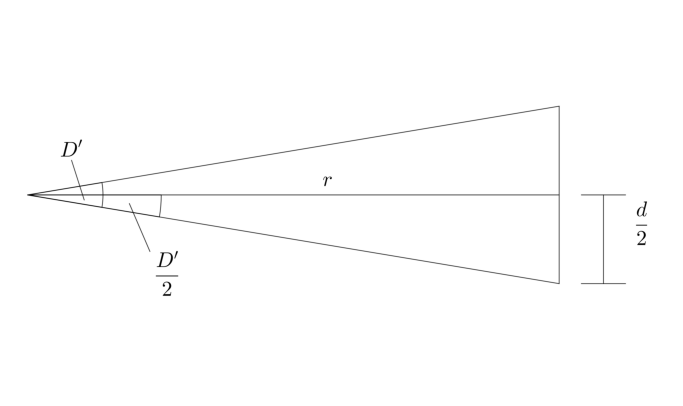

In [2]:
plt.axis("off")
plt.imshow(plt.imread("durchmesser_skizze.png"))

In [3]:
r=10**(36.5/5)/1000
# bogenminuten
D = [4.4, 4.1, 3.3, 3.6, 6.0, 7.0, 4.7, 5.3, 3.1]
D25 = [7.2, 4.5, 4.2, 3.7, 6.9, 6.9, 3.9, 5.4, 3.1]
#in rad
D_rad = [x*math.pi/10800 for x in D]
D25_rad = [x*math.pi/10800 for x in D25]
d = [2*r*math.tan(x/2) for x in D_rad]
d25 = [2*r*math.tan(x/2) for x in D25_rad]
print(f"{r=}, {d=}, {d25=}")

r=19952.62314968879, d=[25.537527833482134, 23.796332326047228, 19.15314473119446, 20.894340011736663, 34.823905677145106, 40.62789368091915, 27.278723438156767, 30.761114965745215, 17.992347918425462], d25=[41.788691480082456, 26.11792635724185, 24.37673081813037, 21.47473845593661, 40.04749480724356, 40.04749480724356, 22.63553537183864, 31.341513597794663, 17.992347918425462]


|NGC   |  Type  |  $D_{25}'$  |   $D'$   |    Durchmesser (kpc) aus $D_{25}'$  |  Durchmesser (kpc) aus $D'$  |   Besonderheiten    |
|------|--------|-------------|--------|:-----------------------------------:|----------------------------|---------------------|
|4486  |  E0    |  7.2        |   4.4  |        41.79                        |    25.54                   | Bei E0 ist Radius gr. Halbachse|
|4473  |  E5    |  4.5        |   4.1  |        26.12                        |    23.80                   |                     |
|4552  |  S0    |  4.2        |   3.3  |        24.38                        |    19.15                   | Unterschied zu E0: lange konstant hell|
|4461  |  Sa    |  3.7        |   3.6  |        21.47                        |    20.89                   | Kaum Sprialarme zu sehen, Buldge deutlich|
|4501  |  Sb    |  6.9        |   6.0  |        40.05                        |    34.82                   |       |
|4321  |  Sc    |  6.9        |   7.0  |        40.04                        |    40.63                   |  |
|4371  |  SBa   |  3.9        |   4.7  |        22.64                        |    27.28                   | Leicht Balken in Richung kl. Halbachse sichtbar|
|4548  |  SBb   |  5.4        |   5.3  |        31.34                        |    30.76                   | |
|4294  |  Sbc   |  3.1        |   3.1  |        17.99                        |    17.99                   | Struktur schwer zu erkennen aufgrund der Neigung|

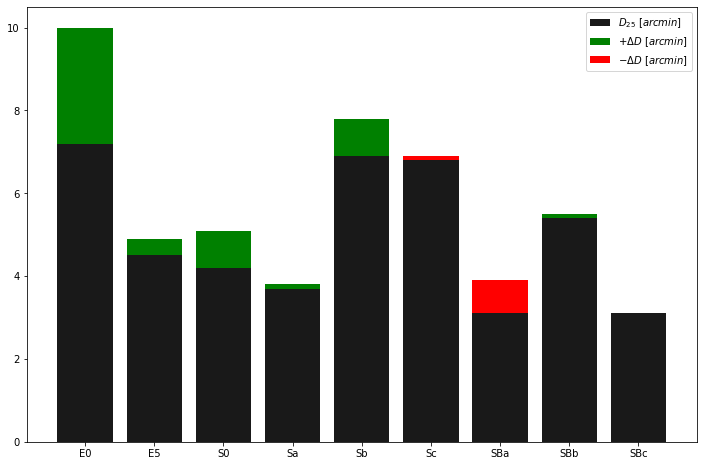

In [4]:
labels = ["E0", "E5", "S0", "Sa", "Sb", "Sc", "SBa", "SBb", "SBc"]
plt.bar(range(9), D25, alpha=.9, color="black",label=r"$D_{25}~[arcmin]$")
plt.bar(range(9), [x-y if x-y > 0 else 0 for x,y in zip(D25,D)], tick_label=labels, bottom=D25, color="green", label=r"$+\Delta D~[arcmin]$")
plt.bar(range(9), [x-y if y-x > 0 else 0 for x,y in zip(D25,D)], tick_label=labels, bottom=D25, color="red", label=r"$-\Delta D~[arcmin]$")
plt.legend()
plt.show()

# Aufgabe 2

1. Objekte aus Tab. 2: Hubble-Typ, Durchmesser (D in Rad), Neigung  
   Neigung für Spiralgalaxien berechnen, mit Annahme, dass sie intrinsisch Kreise sind:  
   Projektion auf Himmelskugel, Inklination $i$ gemessen vom Azimuth:  
   $\sin(i) = \frac{b}{a}$, daraus $i = \arcsin(\frac{b}{a})$, a,b gemessene große (kl.) Halbachsen  (siehe Bild)

2. Gesamthelligkeit m aus Tab. 2 gegen log(D) auftragen, getrennt nach E, S0 und Spiralgalaxien  
   Beziehung zw.  m und log(D):  
   $m = -2.5 \log(\frac{F}{F_0})$  
   $\mu = -2.5 \log(\frac{F}{F_0}/A)$  
   ineinander einsetzen und auf m(D) umformen, mit Annahme für $\mu_g=$const:  
   $m = \mu_G -2.5 \log(A)$  
   A ist Fläche also:  
   $ A \sim D^2$ und somit:  
   $m = -2.5 \log(D^2) + a$, $a$ enthält alle Konstanten und mögliche Faktoren von $A(D^2)$  
   $m = -5 \log(D) + a$  soll gleich sein der Daten mit:  $m = b\log(D) + a$

   Einheiten von A, F, m hierbei nicht wichtig, da diese nur zu Konstanten führen, die in $a$ absorbiert sind  
   Fit ergibt aber -1.5 bis -1.6. Tendenz scheint OK, aber Faktor völlig Falsch.  
   Auch universell zw. E und Spiral anwendbar, laut daten.

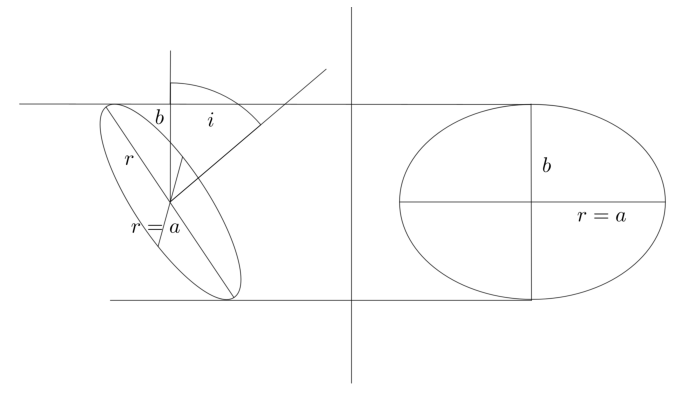

In [5]:
plt.axis("off")
plt.imshow(plt.imread("inklination_skizze.png"))

| NGC | m | Typ | D' | D in Grad | gr. Halbachse a' | kl. Halbachse b' | $i$ | Kommentar zum Typ |
|-----|---|-----|----|----------|-----------------|-----------------|-----|-------------|
| 4294 | 13.0 | SBc | 3.1 | 0.0517 | 1.55 | 0.6 | 22.77° | Typ gegeben |
| 4299 | 13.1 | Sc  | 1.7 | 0.0283 | 0.85 | 0.85 | 90° | "face on" |
| 4302 | 13.2 | Sc / SBc | 4.8 | 0.0800 | 2.4 | 0 | 0° | "edge on", kein dominanter Bulge, Staubstrukturen sichtbar |
| 4321 | 10.8 | Sc | 7.0 | 0.1167 | 3.5 | 2.85 | 54.52° | Typ gegeben |
| 4371 | 12.1 | SBa | 4.7 | 0.0783 | 2.35 | 1.3 | 33.59° | Typ gegeben |
| 4374 | 10.9 | E0 | 5.5 | 0.0917 | - | - | - | wegen Typ keine Inklination, kein Staub |
| 4379 | - | E3 | 2.0 | 0.0333 | - | - | - | wegen Typ keine Inklination, kein Staub |
| 4402 | 12.5 | Sc / SBc | 4.0 | 0.0667 | 2.0 | 0 | 0° | "edge on ", kein dominanter Buldge, Staub sichtbar |
| 4431 | - | E7 | 2.0 | 0.0333 | - | - | - | wegen Typ kein Inklination, kein Staub oder Strukturen |
| 4435 | 11.8 | S0 | 2.3 | 0.0383 | 1.15 | - | 0° | "edge on", "Linsenförmig", Scheibe leicht erkennbar |
| 4440 | - | SBa | 1.6 | 0.0267 | 0.8 | 0.7 | 61.04° | Balken deutlich, mit Spiralarmen als Ring |
| 4461 | 12.4 | Sa | 3.6 | 0.0600 | 1.8 | 0.3 | 9.59° | Typ gegeben |
| 4473 | 11.7 | E5 | 4.1 | 0.0683 | - | - | - | Typ gegeben, wegen Typ keine Inklination |
| 4478 | 12.5 | E3 | 2.2 | 0.0367 | - | - | - | kein Staub od. Strukturen, wegen Typ keine Inklination |
| 4486 | 10.7 | E0 | 4.4 | 0.0733 | - | - | - | Typ gegeben, wegen Typ keine Inklination |
| 4501 | 10.9 | Sb | 6.0 | 0.1000 | 3.0 | 1.35 | 26.74° | Typ gegeben |
| 4516 | - | SBc | 1.2 | 0.0200 | 0.6 | 0.17 | 16.46° | Spiralarme ohne Knick am Balken |
| 4548 | 11.9 | SBb | 5.3 | 0.0883 | 2.65 | 1.75 | 41.33° | Typ gegeben |
| 4552 | 11.3 | E0 / S0 | 3.3 | 0.0550 | - | - | - | Typ gegeben, wegen Typ keine Inklination |
| 4564 | 12.1 | S0 | 2.75 | 0.0458 | - | - | - | "Linsenförmig", "edge on", kein Staub |
| 4568 | - | Sa | 4.6 | 0.0767 | 2.3 | 0.5 | 12.56° | Spiralarme eng, viel Staubstrukturen, deutlicher Buldge |
| 4571 | 12.8 | Sb | 3.0 | 0.0500 | 1.5 | 1.4 | 68.96° | Spiralarme weniger eng, viel Staubstrukturen, deutlicher Buldge |
| 4579 | 11.0 | Sb | 4.3 | 0.0717 | 2.15 | 1.6 | 48.09° | deutlicher Buldge, viel Staubstrukturen, lockere Spiralarme |

In [6]:
D = [3.1, 1.7, 4.8, 7.0, 4.7, 5.5, 2.0, 4.0, 2.0, 2.3, 1.6, 3.6, 4.1, 2.2, 4.4, 6.0, 1.2, 5.3, 3.3, 2.75, 4.6, 3.0, 4.3]
D_grad = [x/60 for x in D]

ab = [(1.55, 0.6), (3.5, 2.85), (2.35, 1.3), (0.8, 0.7), (1.8, 0.3), (3.0, 1.35), (0.6, 0.17), (2.65, 1.75), (2.3, 0.5), (1.5, 1.4), (2.15, 1.6)]
i = [math.asin(b/a)/math.pi*180 for a, b in ab]

print(f"{D_grad=}\n {i=}")

D_grad=[0.051666666666666666, 0.028333333333333332, 0.08, 0.11666666666666667, 0.07833333333333334, 0.09166666666666666, 0.03333333333333333, 0.06666666666666667, 0.03333333333333333, 0.03833333333333333, 0.02666666666666667, 0.060000000000000005, 0.06833333333333333, 0.03666666666666667, 0.07333333333333333, 0.1, 0.02, 0.08833333333333333, 0.055, 0.04583333333333333, 0.07666666666666666, 0.05, 0.07166666666666667]
 i=[22.773972400659893, 54.51679604472114, 33.586239188111655, 61.04497562814015, 9.594068226860461, 26.743683950403007, 16.459249628260228, 41.32865864634341, 12.555857798585976, 68.96053021868275, 48.089234050668516]


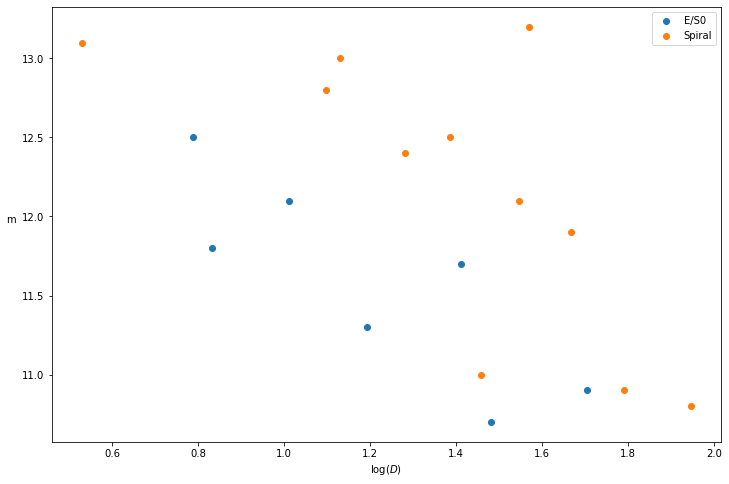

In [7]:
D_E = [5.5, 2.3, 4.1, 2.2, 4.4, 3.3, 2.75]
m_E = [10.9, 11.8, 11.7, 12.5, 10.7, 11.3, 12.1]
D_S = [3.1, 1.7, 4.8, 7.0, 4.7, 4.0, 3.6, 6.0, 5.3, 3.0, 4.3]
m_S = [13.0, 13.1, 13.2, 10.8, 12.1, 12.5, 12.4, 10.9, 11.9, 12.8, 11.0]
D_E_log = [math.log(x) for x in D_E]
D_S_log = [math.log(x) for x in D_S]

plt.scatter(D_E_log, m_E, label="E/S0")
plt.scatter(D_S_log, m_S, label="Spiral")
plt.legend()
plt.xlabel(r"$\log(D)$")
plt.ylabel("m    ", rotation=0)
plt.show()

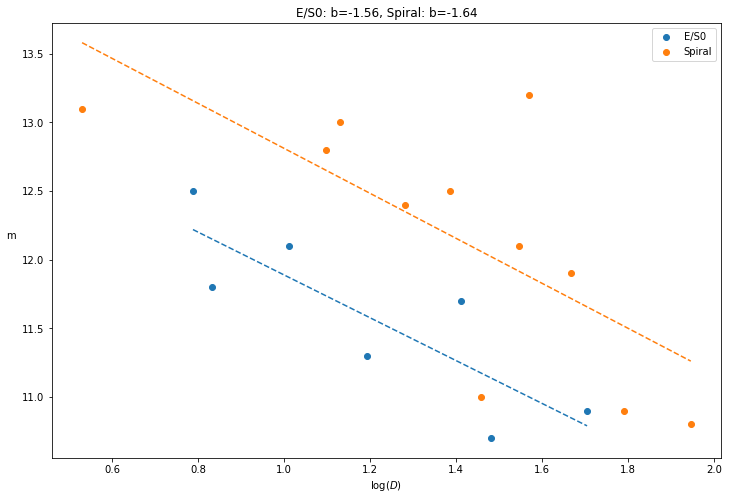

In [8]:
E_b_fit, E_a_fit = np.polyfit(D_E_log, m_E, 1)
E_fit = np.poly1d((E_b_fit, E_a_fit))
S_b_fit, S_a_fit = np.polyfit(D_S_log, m_S, 1)
S_fit = np.poly1d((S_b_fit, S_a_fit))

plt.scatter(D_E_log, m_E, label="E/S0")
plt.scatter(D_S_log, m_S, label="Spiral")
plt.plot(sorted(D_E_log), [E_fit(x) for x in sorted(D_E_log)], ls="--")
plt.plot(sorted(D_S_log), [S_fit(x) for x in sorted(D_S_log)], ls="--")
plt.legend()
plt.xlabel(r"$\log(D)$")
plt.ylabel("m    ", rotation=0)
plt.title(f"E/S0: b={E_b_fit:.2f}, Spiral: b={S_b_fit:.2f}")
plt.show()

# Aufgabe 2

3. $D_{25}$ aus Tab. 1 verwenden um $\mu$ (mittlere Flächenhelligkeit) zu berechnen.  
   Angeben in % von Fluss/Fläche: $\mu_H=$21.6 mag / $arcsec^2$  
   (in der Angabe steht ein Hinweist auf logarithmische Beziehung von $\mu$, keine Ahnung was der soll)  
   mit Näherung von vorher, $A = D^2 \pi/4$:  
   $\mu = m + 5 \log(D[arcsec]) + \log(\pi/4)$

4. Leuchtkraftbereich, angeben in abs mag und solar mag in B:  
   auf absolute mag mit Entfernungsmodul mit $r$ aus aufgabe 1:  
   $M = m -5*\log(r) + 5$ wird zu $M = m - 31$  
   abs mag der Sonne in B: 5.47 m (aus Abriss der Astronomie)

In [9]:
D25 = [7.2, 4.5, 4.2, 3.7, 6.9, 6.9, 3.9, 5.4, 3.1]
D25_arcsec = [x*60 for x in D25]
m = [10.7, 11.7, 11.3, 12.4, 10.9, 10.8, 12.1, 11.9, 13.0]

mu_h = 21.6
mu = [mx + 5*math.log(d) + math.log(math.pi/4) for mx, d in zip(m, D25_arcsec)]
mu_prozent = [x/mu_h*100 for x in mu]
[print(m, p) for m,p in zip(mu, mu_prozent)]
print("\n")


abs_mag = [mx - 31 for mx in m]
solar_lum = [10**((5.47-mx)/2.5) for mx in abs_mag]
[print(am, f"{ams:1e}") for am, ams in zip(abs_mag, solar_lum)]

40.80056346595006 188.89149752754656
39.450545319721385 182.6414135172286
38.705580962286625 179.19250445503064
39.171822434090906 181.3510297874579
40.78776539385608 188.8322471937781
40.68776539385608 188.36928423081517
39.13504110151801 181.18074584036117
40.56215310369115 187.787745850422
38.88716889329552 180.03318932081257


-20.3 2.032357e+10
-19.3 8.090959e+09
-19.7 1.169499e+10
-18.6 4.246196e+09
-20.1 1.690441e+10
-20.2 1.853532e+10
-18.9 5.597576e+09
-19.1 6.729767e+09
-18.0 2.443431e+09


[None, None, None, None, None, None, None, None, None]

# Aufgabe 3

Typ und D der Galaxien aus Tab. 3  
vergleich zwischen Antonia und mir, selbe Tendenz wie Aufgabe 1?  
Mittelwert von D und m für:  
- 3 hellsten
- 5 hellsten

jeweils für E/S0 und Sprial jeweils für Abell 1060 und Virgo  
und dann ohne Trennung in E/S0 und Sprial die hellsten 5  

relative Entfernung (Abell / Virgo) aus D und aus m mit und ohne Trennung  
Rechnung für D:  
$d_A= 2r_A\tan(D_A'/2)$  
$d_V= 2r_V\tan(D_V'/2)$  durchdivideren, Annahme: intrinsisch gleicher durchmesser: $d_V=d_A$  
$\frac{r_A}{r_V}=\frac{tan(D_V'/2)}{\tan(D_A'/2)}$

Rechnung für m (aus Entfernungsmodul):  
$m_A-M_A = 5 \log(r_A) - 5$  
$m_V-M_V = 5 \log(r_V) - 5$ voneinander abziehen, Annahme: intrinsisch gleicher Helligkeit: $M_A = M_V$  
$\frac{r_A}{r_V} = 10^{\frac{m_A - m_V}{5}}$

relative Entfernung aus Radialgeschwindigkeiten:  
Mittelwert über alle Galaxien  
$\frac{r_A}{r_V} = \frac{v_A}{v_V}$

Ergebnisse vegleichen, Genauigkeit diskutieren.

Galaxien von Abell 1060:

|NGC|m|V(km/s)|D arcmin|Typ|Kommentar|
|---|-|-------|-|---|---------|
| 3285 A | 14.0 | - | 1.3 | Sb | Buldge erkennbar, Sprialarme locker |
| 3285 | 13.2 | 3049 | 3.0 | Sa | Sprialarme erkennbar, deutlicher Buldge |
| 3285 B | 14.0 | 2868 | 1.8 | SBa | Ring deutlich, Balken erkennbar |
| 3305 | 14.0 | 4549 | 1.5 | E0 / S0 | Nebelstrukturen nicht auszuschließen |
| 3307 | 16.0 | 3616 | 1.0 | S0 | "Linsenförmig" mit Staub |
| 3308 | 13.0 | 3687 | 2.0 | E3 | kein Staub oder Strukturen, leicht elliptisch |
| 3309 | 12.7 | 3801 | 1.3 | E0 / S0 | Bulge dominiert |
| 3311 | 13.0 | 3575 | 2.2 | E0 / S0 | leichte Strukturen möglich |
| Leda 31444 | 16.0 | 2461 | 0.75 | E3 | leicht elliptisch |
| 3312 | 13.1 | 2512 | 3.2 | Sa | Sprialarme deutlich |
| 3314 | 14.0 | 2625 | 1.8 | Irr | Merger ? |
| Leda 31537 | 15.0 | 4555 | 1.1 | S0 | Linsenförmig |
| 3316 | 15.0 | 3752 | 1.0 | So | Linsenförmig |
| IC 2597 | 13.0 | 2738 | 2.7 | E3 | leicht elliptisch |
| 3336 | 13.0 | 3689 | 2.2 | Sa | Sprialarme deutlich, eng |

In [10]:
D_A = [1.3, 3, 1.8, 1.5, 1, 2, 1.3, 2.2, 0.75, 3.2, 1.8, 1.1, 1, 2.7, 2.2]

# 3 hellste:
# 4374, 4486, 4552
D_E_V = [5.5, 4.4, 3.3]
m_E_V = [10.9, 10.7, 11.3]
D_E_avg3_V = np.average(D_E_V)
m_E_avg3_V = np.average(m_E_V)
# 4321, 4501, 4579
D_S_V = [7.0, 6.0, 4.3]
m_S_V = [10.8, 10.9, 11.0]
D_S_avg3_V = np.average(D_S_V)
m_S_avg3_V = np.average(m_S_V)

# 3309, IC 2597, 3311 
D_E_A = [1.3, 2.7, 2.2]
m_E_A = [12.7, 13, 13]
D_E_avg3_A = np.average(D_E_A)
m_E_avg3_A = np.average(m_E_A)
# 3336, 3312, 3285
D_S_A = [2.2, 3.2, 3]
m_S_A = [13, 13.1, 13.2]
D_S_avg3_A = np.average(D_S_A)
m_S_avg3_A = np.average(m_S_A)

# 5 hellste:
# 4374, 4435, 4473, 4486, 4552
D_E_V = [5.5, 2.3, 4.1, 4.4, 3.3]
m_E_V = [10.9, 11.8, 11.7, 10.7, 11.3]
D_E_avg5_V = np.average(D_E_V)
m_E_avg5_V = np.average(m_E_V)
# 4321, 4371, 4501, 4548, 4579
D_S_V = [7.0, 4.7, 6.0, 5.3, 4.3]
m_S_V = [10.8, 12.1, 10.9, 11.9, 11.0]
D_S_avg5_V = np.average(D_S_V)
m_S_avg5_V = np.average(m_S_V)

# 3309, IC 2597, 3311, 3308, 3305
D_E_A = [1.3, 2.7, 2.2, 2, 1.5]
m_E_A = [12.7, 13, 13, 13, 14]
D_E_avg5_A = np.average(D_E_A)
m_E_avg5_A = np.average(m_E_A)
# 3336, 3312, 3285, 3285B, 8285A
D_S_A = [2.2, 3.2, 3, 1.8, 1.3]
m_S_A = [13, 13.1, 13.2, 14, 14]
D_S_avg5_A = np.average(D_S_A)
m_S_avg5_A = np.average(m_S_A)

# 5 hellste ohne Trennung
# 4486, 4321, 4501, 4374, 4579
D_V = [4.4, 7.0, 6.0, 5.5, 4.3]
m_V = [10.7, 10.8, 10.9, 10.9, 11.0]
D_avg_V = np.average(D_V)
m_avg_V = np.average(m_V)

# 3309, 3336, IC 2597, 3311, 3308
D_A = [1.3, 2.2, 2.7, 2.2, 2]
m_A = [12.7, 13, 13, 13, 13]
D_avg_A = np.average(D_A)
m_avg_A = np.average(m_A)


# radial V
# wert f. alle GAl aus Virgo
v_V = 1151
v_A = np.average([3049, 2868, 4549, 3616, 3687, 3801, 3575, 2461, 2512, 2635, 4555, 3752, 2738, 3689])

print("averages:\n"
        f"{D_E_avg3_V=:.2f} \t{D_E_avg3_A=:.2f} \t{D_S_avg3_V=:.2f} \t{D_S_avg3_A=:.2f}\n"
        f"{m_E_avg3_V=:.2f} \t{m_E_avg3_A=:.2f} \t{m_S_avg3_V=:.2f} \t{m_S_avg3_A=:.2f}\n"
        f"{D_E_avg5_V=:.2f} \t{D_E_avg5_A=:.2f} \t{D_S_avg5_V=:.2f} \t{D_S_avg5_A=:.2f}\n"
        f"{m_E_avg5_V=:.2f} \t{m_E_avg5_A=:.2f} \t{m_S_avg5_V=:.2f} \t{m_S_avg5_A=:.2f}\n"
        f"{D_avg_V=:.2f}\t{D_avg_A=:.2f}\n"
        f"{m_avg_V=:.2f}\t{m_avg_A=:.2f}\n"
        f"{v_V=:.2f}\t{v_A=:.2f}")

print("m\t3 E/S0\t3 S\t5 E/S0\t5 S\t5 E/S0/S")
# r_A / r_V aus m
print(f"aus m:\t{10**((m_E_avg3_A-m_E_avg3_V)/5):.2f}\t{10**((m_S_avg3_A-m_S_avg3_V)/5):.2f}\t{10**((m_E_avg5_A-m_E_avg5_V)/5):.2f}\t{10**((m_S_avg5_A-m_S_avg5_V)/5):.2f}\t{10**((m_avg_A-m_avg_V)/5):.2f}")
# r_A / r_V aus D
print(f"aus D:\t{math.tan(D_E_avg3_V/2*math.pi/10800)/math.tan(D_E_avg3_A/2*math.pi/10800):.2f}"
        f"\t{math.tan(D_S_avg3_V/2*math.pi/10800)/math.tan(D_S_avg3_A/2*math.pi/10800):.2f}"
        f"\t{math.tan(D_E_avg5_V/2*math.pi/10800)/math.tan(D_E_avg5_A/2*math.pi/10800):.2f}"
        f"\t{math.tan(D_S_avg5_V/2*math.pi/10800)/math.tan(D_S_avg5_A/2*math.pi/10800):.2f}"
        f"\t{math.tan(D_avg_V/2*math.pi/10800)/math.tan(D_avg_A/2*math.pi/10800):.2f}")
print(f"aus V: \t\t {v_A/v_V:.2f}")

averages:
D_E_avg3_V=4.40 	D_E_avg3_A=2.07 	D_S_avg3_V=5.77 	D_S_avg3_A=2.80
m_E_avg3_V=10.97 	m_E_avg3_A=12.90 	m_S_avg3_V=10.90 	m_S_avg3_A=13.10
D_E_avg5_V=3.92 	D_E_avg5_A=1.94 	D_S_avg5_V=5.46 	D_S_avg5_A=2.30
m_E_avg5_V=11.28 	m_E_avg5_A=13.14 	m_S_avg5_V=11.34 	m_S_avg5_A=13.46
D_avg_V=5.44	D_avg_A=2.08
m_avg_V=10.86	m_avg_A=12.94
v_V=1151.00	v_A=3391.93
m	3 E/S0	3 S	5 E/S0	5 S	5 E/S0/S
aus m:	2.44	2.75	2.36	2.65	2.61
aus D:	2.13	2.06	2.02	2.37	2.62
aus V: 		 2.95
